In [2]:
%matplotlib inline
# Plot everything as SVG
%config InlineBackend.figure_formats=['svg']

# Hide warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We'll use this later to visualize lines
def make_line(m, b, frm=0, to=200):
    xs = np.linspace(frm, to, 500)
    ys = np.dot(xs[:,np.newaxis], [m]) + b
    return xs, ys

In [51]:
# linear
def f(x):
    return 1.8 * x + np.random.normal(0, 12, x.shape[0]) + 50

xs = np.linspace(50,150,100)
ys = f(xs)
data = np.vstack([xs, ys]).T
df = pd.DataFrame(data, columns=['Weight', 'Size'])
df.to_csv('../data/fashion.csv', index=False)

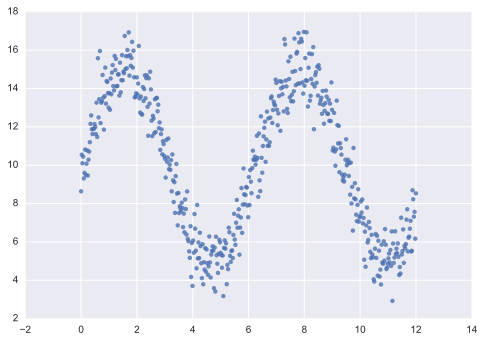

In [3]:
# nonlinear
xs = np.linspace(0, 12, 500)
ys = np.sin(xs) * 5 + np.random.randn(*xs.shape) + 10
sns.regplot(xs, ys, fit_reg=False)

In [4]:
data = np.vstack([xs, ys]).T
df = pd.DataFrame(data, columns=['Time', 'Sales'])
df.head()

,Time,Sales
0,0.000000,8.639429
1,0.024048,10.550833
2,0.048096,10.103700
3,0.072144,10.448219
4,0.096192,9.313215


In [5]:
df.to_csv('../data/seasonal.csv', index=False)

In [40]:
from sklearn.datasets import make_classification

n_samples = 500
data, labels = make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0,
                                   shift=(15, 50),
                                   scale=(2,2),
                                   class_sep=5.,
                                   n_clusters_per_class=1)
labels = labels.reshape(n_samples,1)
data = np.hstack([data, labels])
df = pd.DataFrame(data, columns=['Age', 'Time on site', 'Purchased'])
df.head()

,Age,Time on site,Purchased
0,39.945219,90.718666,0.0
1,37.840693,88.991427,0.0
2,20.504708,110.649832,1.0
3,40.428057,89.728993,0.0
4,40.800617,88.735481,0.0


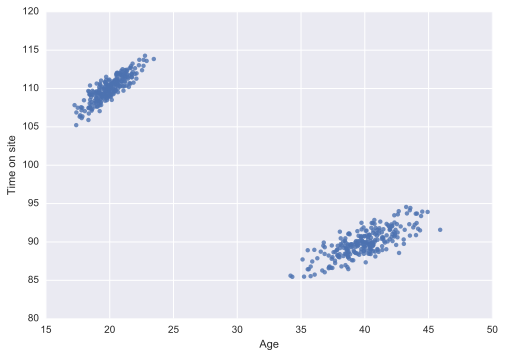

In [41]:
sns.lmplot('Age', 'Time on site', data=df, fit_reg=False, hue='Purchased')

In [42]:
df.to_csv('../data/classification.csv', index=False)

In [53]:
from sklearn.datasets import make_moons
n_samples = 1000
data, labels = make_moons(n_samples=n_samples, shuffle=True, noise=(0.1,0.1), random_state=None)
labels = labels.reshape(n_samples,1)
data = np.hstack([data, labels])
df = pd.DataFrame(data, columns=['Age', 'Friends', 'Recommended'])
df.head()

,Age,Friends,Recommended
0,-0.080402,1.055525,0.0
1,-0.583689,0.903746,0.0
2,1.827524,-0.091287,1.0
3,-0.020863,0.518933,1.0
4,1.500793,-0.294553,1.0


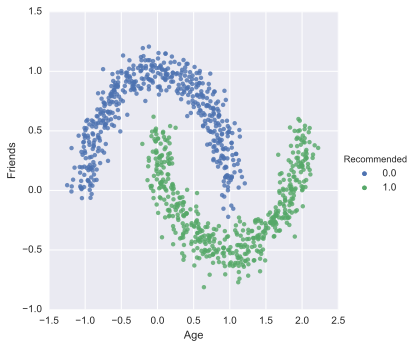

In [54]:
sns.lmplot('Age', 'Friends', data=df, fit_reg=False, hue='Recommended')

In [55]:
df.to_csv('../data/classification_nonlinear.csv', index=False)